(peeling)=
# Data peeling algorithm

The **data peelilng algorithm** constructs a hierarchy of nested enclosing regions, which serve as calibrated consonant *Dempster-Shafer structures* whose basic beliefs are set equal to the scenario lower probabilities. 

It begins by selecting a geometric shape for the enclosing sets, such as a rectangle or higher-dimensional hyper-box. The algorithm solves an optimisation problem to determine the smallest possible region or set that contains all data points.

The points that lie on the boundary and mathematically define this minimal region are treated as *support vectors*. Once identified, these boundary points are iteratively removed from the dataset (*peeling*), while the process is repeated on the reduced set, producing progressively smaller, mutually nested layers. 

In [2]:
from pyuncertainnumber.calibration import data_peeling as dp

### data generating process

In [3]:
X = dp.banana_data(n=100,d=3)

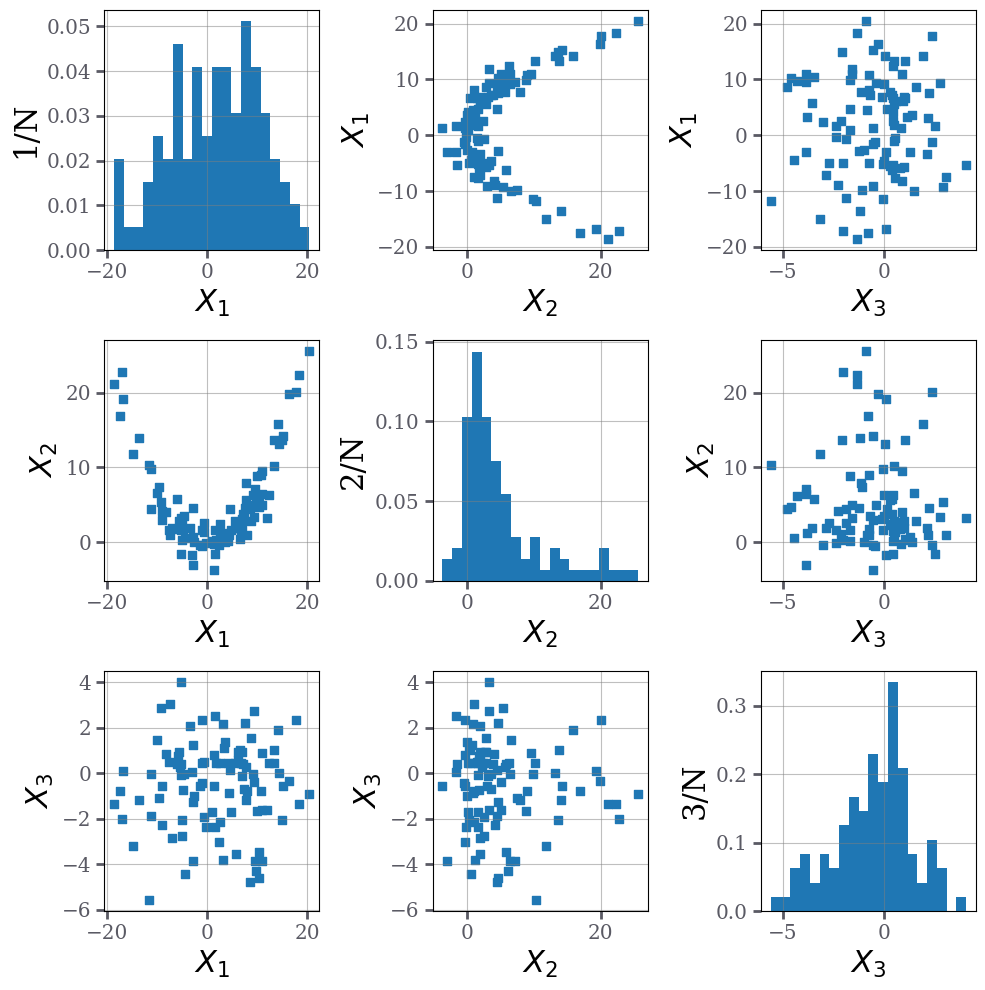

In [6]:
dp.plot_scattermatrix(X,bins=20,figsize=(10,10))

### peeling algorithm

```{tip}
**a**: is a list of subindices corresponding to the support vectors
**b**: is a list of enclosing sets (boxes by default)
```

In [ ]:
a,b = dp.data_peeling_algorithm(X,tol=0.01)

```{tip}
**f**: is a structure containing projections
**p**: is a list of lower probability, one for each level
```

In [ ]:
f,p = dp.peeling_to_structure(a,b,kind='scenario',beta=0.01)

/Users/lesliec/Documents/Github_repos/pyuncertainnumber/src/pyuncertainnumber/calibration/data_peeling/scenario.py:77: RuntimeWarning: divide by zero encountered in log
  aux2 = numpy.sum(triu(log(repmat(m1-k,N-k+1,1)),k=1),axis=1) # aux2 = sum(triu(log(ones(N-k+1,1)*(m1-k)),1),2);
/Users/lesliec/Documents/Github_repos/pyuncertainnumber/src/pyuncertainnumber/calibration/data_peeling/scenario.py:102: RuntimeWarning: divide by zero encountered in log
  poly1 = 1+bet/(2*N)-bet/(2*N)*sum(exp(coeffs1 - (N-m1)*log(t1)))-bet/(6*N)*sum(exp(coeffs2 + (m2-N)*log(t1)));
/Users/lesliec/Documents/Github_repos/pyuncertainnumber/src/pyuncertainnumber/calibration/data_peeling/scenario.py:102: RuntimeWarning: invalid value encountered in multiply
  poly1 = 1+bet/(2*N)-bet/(2*N)*sum(exp(coeffs1 - (N-m1)*log(t1)))-bet/(6*N)*sum(exp(coeffs2 + (m2-N)*log(t1)));


### Visualise the resulting structures

The final result is a full sequence of nested level sets that encode the depth structure of the data. Posterior samples are finally generated from a mixture distribution within the credal set identified by the calibrated consonant structure.

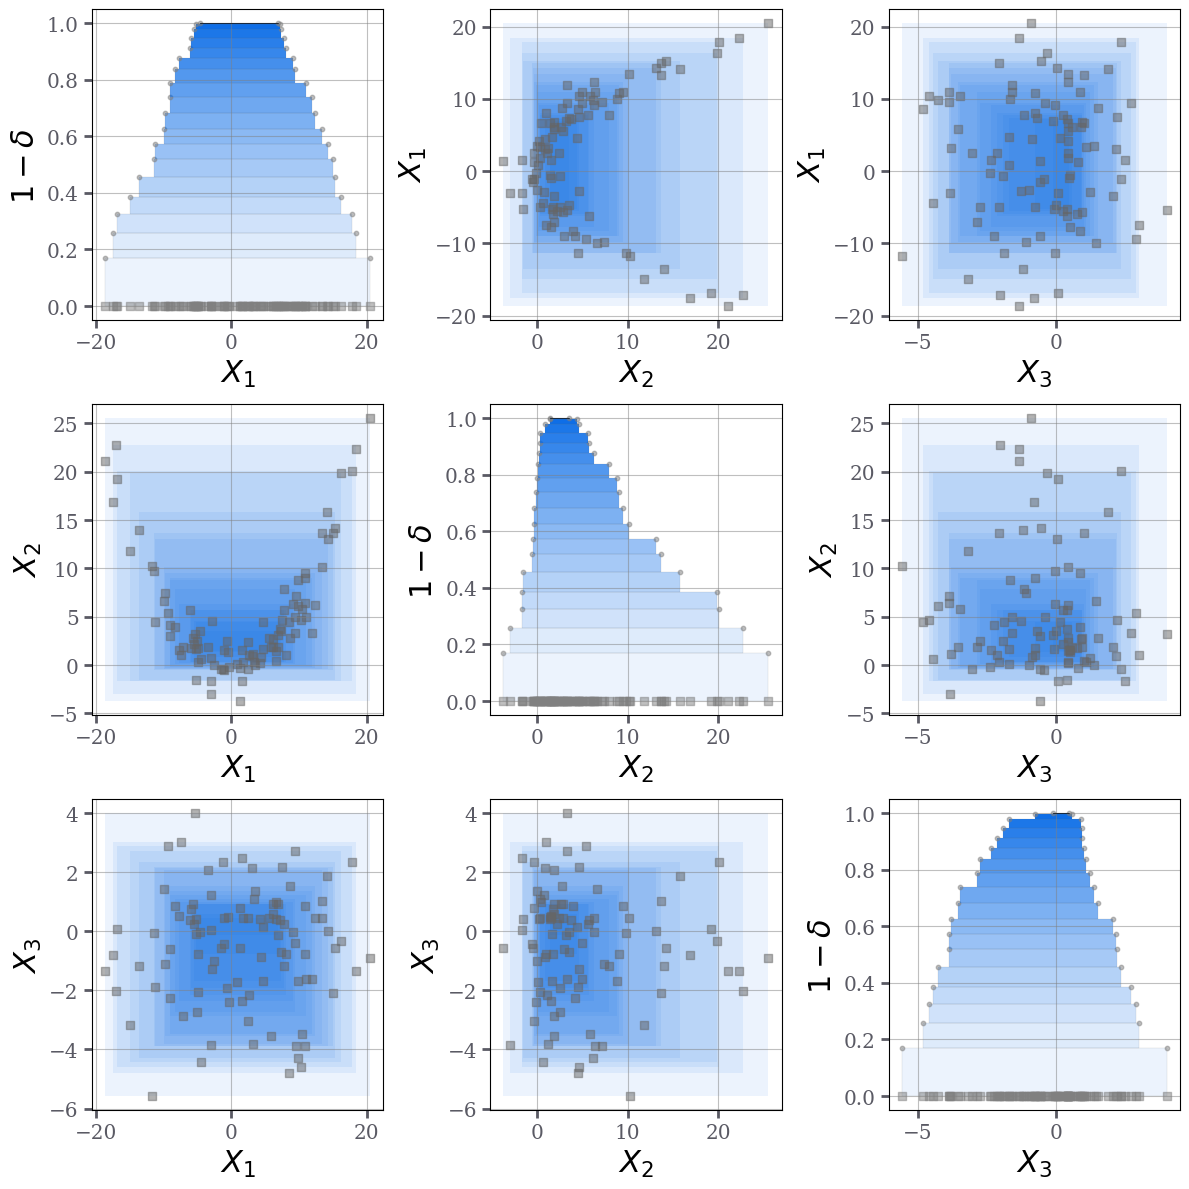

In [11]:
dp.plot_peeling_nxd(X,a,b,p=p,figsize=(12,12))